# CENSUS ANNUAL BUSINESS INSIGHTS DATA ANALYSIS

## DEV10 WEEK 8 ASSESSMENT
### Group: Alexandra Reilly, Jessica Hoffman, Vanessa Schroeder
## Introduction
We were assigned to examine data within census data, specifically, the Annual Business Survey for 2019. We decided to give a high level overview of the dataset.

Some of the questions we initially wanted to investigate were:
- Is the annual salary difference between races and between genders enough to be statistically significant? If so, would the intersection of being a minority (e.g. a black woman) have more of an impact than one of these factors alone?
- What states have the highest percentage of veteran workers?
- What effect did COVID have on annual pay or other factors?


## ETL
### Data Sources
Our data was extracted from: api.census.gov/data.html

From the Data Catalog website:
*“The Census Bureau is the federal government’s largest statistical agency. We are dedicated to providing current facts and figures about America’s people, places, and economy. Federal law protects the confidentiality of all the information the Census Bureau collects.”*

### Extraction
We used Python to call the Census API tool
The API extracted the data in JSON format

### Transformation
We then used Pandas to create our dataframe, and MatPlotLib to build graphs off of that data.
We used Python pandas to load the data from the JSON file into dataframes.

### Load
Since we did not need to load the data from the Jupyter Notebook into any other application, we did not require a load step. However, if we wanted to store the data permanently in a SQL database, for instance, we could use the pandas built in 'to_sql'.

*DataFrame.to_sql(name, con, schema=None, if_exists='fail', index=True, index_label=None, chunksize=None, dtype=None, method=None)*

In [708]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import plotly.express as px

from config import api_key
from config import absjson2019,absjson2020,absjson2021
from config import absjson_us19,absjson_us20,absjson_us21 

In [685]:
#before any import run this
%load_ext autoreload
%autoreload 2

# set max_rows option to None to display all rows
pd.options.display.max_rows = 999

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [695]:
HOST = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscs'
# geography = 'us'
geography = 'state'
# geography = 'metropolitan statistical area/micropolitan statistical area'
params = {
    'get': 'YEAR,NAICS2017,NAICS2017_LABEL,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL',
    'for': f'{geography}:*'
    # 'key': api_key
}
base_url = '/'.join([HOST,year,dataset])
response = requests.get(base_url,params=params)

year2 = '2019'
base_url2 = '/'.join([HOST,year2,dataset])
response2 = requests.get(base_url2,params=params)

year3 = '2020'
base_url3 = '/'.join([HOST,year3,dataset])
response3 = requests.get(base_url3,params=params)

In [696]:
HOST = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscs'
geography1 = 'us'
params_us = {
    'get': 'YEAR,NAICS2017,NAICS2017_LABEL,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL',
    'for': f'{geography1}:*'
    # 'key': api_key
}
base_url = '/'.join([HOST,year,dataset])
response_us19 = requests.get(base_url,params=params_us)

year2 = '2019'
base_url2 = '/'.join([HOST,year2,dataset])
response_us20 = requests.get(base_url2,params=params_us)

year3 = '2020'
base_url3 = '/'.join([HOST,year3,dataset])
response_us21 = requests.get(base_url3,params=params_us)

The code below reads the data from the API call at the state level geography and saves it as JSON files in the data folder.

In [691]:
data2019 = response.json()
with open(absjson2019, 'w') as f:
    json.dump(data2019, f)

data2020 = response2.json()
with open(absjson2020, 'w') as f:
    json.dump(data2020, f)

data2021 = response3.json()
with open(absjson2021, 'w') as f:
    json.dump(data2021, f)

The code below reads the data from the API call at the national (US) level geography and saves it as JSON files in the data folder.

In [709]:
us2019 = response_us19.json()
with open(absjson_us19, 'w') as f:
    json.dump(us2019, f)

us2020 = response_us20.json()
with open(absjson_us20, 'w') as f:
    json.dump(us2020, f)

us2021 = response_us21.json()
with open(absjson_us21, 'w') as f:
    json.dump(us2021, f)

The code below reads the data in from the locally saved JSON files into appropriately named data frames. Census is the data frame resulting from the concatenation of each of the years 2019,20202,2021 at the state level. This is the main denormalized table from which normalized data frames will be created and which data will be investigated by merges of the ~2NF normalized tables.

In [710]:
census2019 = pd.read_json(absjson2019)
census2019 = pd.DataFrame(data2019[1:], columns=data2019[0])

census2020 = pd.read_json(absjson2020)
census2020 = pd.DataFrame(data2020[1:], columns=data2020[0])

census2021 = pd.read_json(absjson2021)
census2021 = pd.DataFrame(data2021[1:], columns=data2021[0])

census = pd.concat([census2019,census2020,census2021])
census.tail(3)

,YEAR,NAICS2017,NAICS2017_LABEL,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,state
224654,2020,519,Other information services,Minnesota,0,0,004,Equally male/female,00,Total,001,Total,27
224655,2020,519,Other information services,Minnesota,0,0,001,Total,30,White,001,Total,27
224656,2020,519,Other information services,Minnesota,0,0,001,Total,40,Black or African American,001,Total,27


Similarly, census_us is the data frame resulting from the concatenation of each of the years 2019,20202,2021 at the National (US) level. This is the main denormalized table from which data is later pulled for an overview of COVID years impact on industry sectors.

In [712]:
census_us_2019 = pd.read_json(absjson_us19)
census_us_2019 = pd.DataFrame(us2019[1:], columns=us2019[0])

census_us_2020 = pd.read_json(absjson_us20)
census_us_2020 = pd.DataFrame(us2020[1:], columns=us2020[0])

census_us_2021 = pd.read_json(absjson_us21)
census_us_2021 = pd.DataFrame(us2021[1:], columns=us2021[0])

census_us = pd.concat([census_us_2019,census_us_2020,census_us_2021])
census_us.tail(3)

,YEAR,NAICS2017,NAICS2017_LABEL,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,us
22111,2020,11,"Agriculture, forestry, fishing and hunting",United States,7403,310743,003,Male,00,Total,002,Veteran,1
22112,2020,11,"Agriculture, forestry, fishing and hunting",United States,34499,1169783,004,Equally male/female,00,Total,004,Nonveteran,1
22113,2020,11,"Agriculture, forestry, fishing and hunting",United States,201335,7701265,001,Total,30,White,001,Total,1


This data set was relatively clean and did not require any cleaning in other applications.  

For 'YEAR', a table was created to find the unique values in this field.

In [135]:
years = census[['YEAR']].drop_duplicates()
years

,YEAR
0,2018
0,2019
0,2020


For 'NAME', the field referring to state names, a table was created to find the unique values in this field. Note, there are 51 states in this tables, including District of Columbia.

In [713]:
states = census[['NAME']].drop_duplicates()
states = states.sort_values('NAME').reset_index(drop=True)
numstates = len(states['NAME']) 
print(f'{numstates} states including DC')
states.head(9)

51 states including DC


,NAME
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia


For 'SEXES' a table was created to find the unique values in this field. TOTAL was removed from the individual values to avoid value duplication but allow for merging only on the total value for other analyses.

In [513]:
sexes=census[['SEX','SEX_LABEL']].drop_duplicates()
sexes_total = sexes.loc[sexes['SEX_LABEL'] == 'Total']
sexes = sexes.loc[sexes['SEX_LABEL'] != 'Total']

display(sexes)
display(sexes_total)

,SEX,SEX_LABEL
1,003,Male
6,002,Female
8,004,Equally male/female


,SEX,SEX_LABEL
0,001,Total


For 'RACES' a table was created to find the unique values in this field. TOTAL was removed from the individual values to avoid value duplication but allow for merging only on the total value for other analyses. Also the Rollup categories of Minority, Equally minority/nonminority, and Nonminority were separated out.

In [518]:
races_all=census[['RACE_GROUP','RACE_GROUP_LABEL']].drop_duplicates()
races_total = races_all.loc[races_all['RACE_GROUP_LABEL']=='Total']
display(races_total)

races_all = races_all.loc[races_all['RACE_GROUP_LABEL'] !='Total']
display(races_all)

races_rollup = races_all.loc[races_all['RACE_GROUP_LABEL'].isin(['Minority','Nonminority','Equally minority/nonminority'])]
display(races_rollup)

races = races_all.loc[~races_all['RACE_GROUP_LABEL'].isin(['Minority','Nonminority','Equally minority/nonminority'])]
display(races)

,RACE_GROUP,RACE_GROUP_LABEL
13,00,Total


,RACE_GROUP,RACE_GROUP_LABEL
0,30,White
1,90,Minority
2,91,Equally minority/nonminority
4,92,Nonminority
5,40,Black or African American
9,50,American Indian and Alaska Native
18,60,Asian
312,70,Native Hawaiian and Other Pacific Islander


,RACE_GROUP,RACE_GROUP_LABEL
1,90,Minority
2,91,Equally minority/nonminority
4,92,Nonminority


,RACE_GROUP,RACE_GROUP_LABEL
0,30,White
5,40,Black or African American
9,50,American Indian and Alaska Native
18,60,Asian
312,70,Native Hawaiian and Other Pacific Islander


For 'VET_STATUSES' a table was created to find the unique values in this field. TOTAL was removed from the individual values to avoid value duplication but allow for merging only on the total value for other analyses. 

In [519]:
vet_statuses=census[['VET_GROUP','VET_GROUP_LABEL']].drop_duplicates()
vet_statuses_total=vet_statuses.loc[vet_statuses['VET_GROUP_LABEL']=="Total"]
vet_statuses_notot = vet_statuses.loc[vet_statuses['VET_GROUP_LABEL']!="Total"]
display(vet_statuses)
display(vet_statuses_total)
display(vet_statuses_notot)

,VET_GROUP,VET_GROUP_LABEL
0,003,Equally veteran/nonveteran
1,001,Total
13,002,Veteran
14,004,Nonveteran


,VET_GROUP,VET_GROUP_LABEL
1,001,Total


,VET_GROUP,VET_GROUP_LABEL
0,003,Equally veteran/nonveteran
13,002,Veteran
14,004,Nonveteran


For Industry Sector groupings, a table was created to find the unique values in this field. TOTAL was removed from the individual values to avoid value duplication but allow for merging only on the total value for other analyses. In this case filtering for string length of 2 and 5 on the 'NAICS2017' code allowed for a drastic reduction in industry listings to only the main 19 sectors. Some groupings from the census list a range of numbers (e.g. 31-33).

In [520]:
all_sectors = census[['NAICS2017','NAICS2017_LABEL']].drop_duplicates()
sectors = all_sectors[all_sectors['NAICS2017'].str.len().isin([2,5])]
sectors_tot = sectors.loc[sectors['NAICS2017_LABEL']=='Total for all sectors']
sectors = sectors.loc[sectors['NAICS2017_LABEL']!='Total for all sectors']
sectors.reset_index(drop=True,inplace=True)
display(sectors)
display(sectors_tot)

,NAICS2017,NAICS2017_LABEL
0,21,"Mining, quarrying, and oil and gas extraction"
1,23,Construction
2,31-33,Manufacturing
3,42,Wholesale trade
4,48-49,Transportation and warehousing
5,44-45,Retail trade
6,11,"Agriculture, forestry, fishing and hunting"
7,22,Utilities
8,52,Finance and insurance
9,54,"Professional, scientific, and technical services"


,NAICS2017,NAICS2017_LABEL
0,00,Total for all sectors


# RESULTS
## Alex [topic]

## Vanessa [topic]

## Jessica VETERAN STATUS
This section investigates differences in annual revenue per employee based on state and veteran status in the 2019.  

By merging the previously normalized tables on matching keys, I was able to investigate different demographic breakouts of the main numerical data of interest for my study: number of employees ('EMP') and annual pay ('PAYANN').

In [632]:
cdf = pd.merge(census,vet_statuses,how='inner',on='VET_GROUP_LABEL')
cdf = pd.merge(cdf,sexes,how='inner',on='SEX_LABEL')
cdf = pd.merge(cdf,races,how='inner',on='RACE_GROUP_LABEL')
cdf = pd.merge(cdf,sectors,how='inner',on='NAICS2017_LABEL')
cdf = cdf[['YEAR','NAICS2017_x','NAICS2017_LABEL','NAME','EMP','PAYANN','SEX_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL']]
# display(cdf.head(5))

cdf_us = pd.merge(census_us,vet_statuses_total,how='inner',on='VET_GROUP_LABEL')
cdf_us = pd.merge(cdf_us,sexes_total,how='inner',on='SEX_LABEL')
cdf_us = pd.merge(cdf_us,races_total,how='inner',on='RACE_GROUP_LABEL')
cdf_us = pd.merge(cdf_us,sectors,how='inner',on='NAICS2017_LABEL')
cdf_us = cdf_us[['YEAR','NAICS2017_x','NAICS2017_LABEL','NAME','EMP','PAYANN','SEX_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL']]
# display(cdf_us.head(5))


Converting annual pay variable from an object to a numeric type permitted aggregate calculations, namely 'mean.' Taking a quick look at the pivot tables made it clear that there would be issues breaking the data down further into races of veterans or male and female veterans, which informed future analysis at the state level for all veterans (total).

In [271]:
# Convert the PAYANN column from string(object) to a numeric type
cdf['PAYANN'] = pd.to_numeric(cdf['PAYANN'])
cdf['EMP'] = pd.to_numeric(cdf['EMP'])

# Pivot the data to create a multi-level index with state, sex, veteran status
pivot = pd.pivot_table(cdf, values='PAYANN', index=['YEAR','NAME', 'SEX_LABEL', 'VET_GROUP_LABEL','RACE_GROUP_LABEL'], aggfunc='mean')
display(pivot.head(10))

# Pivot the data to create a multi-level index with state, sex, veteran status
pivot2 = pd.pivot_table(cdf, values='PAYANN', index=['YEAR','NAME', 'SEX_LABEL', 'VET_GROUP_LABEL'],columns='RACE_GROUP_LABEL', aggfunc='mean')
display(pivot2.head(10))

PAYANN
YEAR NAME    SEX_LABEL           VET_GROUP_LABEL            RACE_GROUP_LABEL                               
2018 Alabama Equally male/female Equally veteran/nonveteran Black or African American              0.000000
                                                            White                                875.000000
                                 Nonveteran                 American Indian and Alaska Native      0.000000
                                                            Asian                                  0.000000
                                                            Black or African American            514.285714
                                                            White                              38961.050000
                                 Total                      American Indian and Alaska Native      0.000000
                                                            Asian                                  0.000000
                                                            Black or African American            514.285714
                                                            White                              54957.550000

RACE_GROUP_LABEL                                             American Indian and Alaska Native  \
YEAR NAME    SEX_LABEL           VET_GROUP_LABEL                                                 
2018 Alabama Equally male/female Equally veteran/nonveteran                                NaN   
                                 Nonveteran                                           0.000000   
                                 Total                                                0.000000   
                                 Veteran                                                   NaN   
             Female              Nonveteran                                        6831.777778   
                                 Total                                             6831.777778   
                                 Veteran                                                   NaN   
             Male                Equally veteran/nonveteran                                NaN   
                                 Nonveteran                                           0.000000   
                                 Total                                                0.000000   

RACE_GROUP_LABEL                                                    Asian  \
YEAR NAME    SEX_LABEL           VET_GROUP_LABEL                            
2018 Alabama Equally male/female Equally veteran/nonveteran           NaN   
                                 Nonveteran                      0.000000   
                                 Total                           0.000000   
                                 Veteran                              NaN   
             Female              Nonveteran                  19743.833333   
                                 Total                       19743.833333   
                                 Veteran                              NaN   
             Male                Equally veteran/nonveteran           NaN   
                                 Nonveteran                  36520.437500   
                                 Total                       37011.312500   

RACE_GROUP_LABEL                                             Black or African American  \
YEAR NAME    SEX_LABEL           VET_GROUP_LABEL                                         
2018 Alabama Equally male/female Equally veteran/nonveteran                   0.000000   
                                 Nonveteran                                 514.285714   
                                 Total                                      514.285714   
                                 Veteran                                      0.000000   
             Female              Nonveteran                                2188.200000   
                                 Total                                     2188.200000   
                                 Veteran                                      0.000000   
             Male                Equally veteran/nonveteran                   0.000000   
                                 Nonveteran                                2497.187500   
                                 Total                                     7797.235294   

RACE_GROUP_LABEL                                             Native Hawaiian and Other Pacific Islander  \
YEAR NAME    SEX_LABEL           VET_GROUP_LABEL                                                          
2018 Alabama Equally male/female Equally veteran/nonveteran                                         NaN   
                                 Nonveteran                                                         NaN   
                                 Total                                                              NaN   
                                 Veteran                                                            NaN   
             Female              Nonveteran                                                         0.0   
                                 Total                              

For this particular section, I only wanted to look at the 2019 dataset. Other code is included to perform similar operators on the '20 and '21 datasets. 

In [633]:
df2019 = cdf.loc[cdf['YEAR']=='2018'].reset_index(drop=True)
# df2020 = cdf.loc[cdf['YEAR']=='2019'].reset_index(drop=True)
# df2021 = cdf.loc[cdf['YEAR']=='2020'].reset_index(drop=True)
# df2019.head(10)

I grouped the 2019 transformed data set by State and Veteran Status, with an aggregated average of the numerical columns: number employees and annual pay. From there I created a new column indicating Revenue per Employee by State and Veteran Status.

In [400]:
# Remove missing values
df2019.dropna(inplace=True)

vetpaybystate = df2019.groupby(['NAME','VET_GROUP_LABEL']).agg('mean')
vetpaybystate['revenue_per_employee'] = vetpaybystate.apply(lambda row: row['PAYANN']/row['EMP'] if row['EMP'] != 0 else 0,axis=1)
vetpaybystate.head(7)

C:\Users\13073\AppData\Local\Temp\ipykernel_18452\589452164.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



EMP         PAYANN  \
NAME    VET_GROUP_LABEL                                          
Alabama Equally veteran/nonveteran    21.516129     423.387097   
        Nonveteran                  3724.114650  146823.624204   
        Total                       4279.823899  174995.150943   
        Veteran                      164.941176    2976.607843   
Alaska  Equally veteran/nonveteran     0.000000       0.000000   
        Nonveteran                   371.790541   24625.364865   
        Total                        392.105960   26294.264901   

                                    revenue_per_employee  
NAME    VET_GROUP_LABEL                                   
Alabama Equally veteran/nonveteran             19.677661  
        Nonveteran                             39.425109  
        Total                                  40.888400  
        Veteran                                18.046481  
Alaska  Equally veteran/nonveteran              0.000000  
        Nonveteran                             66.234512  
        Total                                  67.059080

I created two bar graphs, one showing the overall average revenue per employee by state (total), and then did a grouped side-by-side bar chart comparing veterans and non veterans by state.

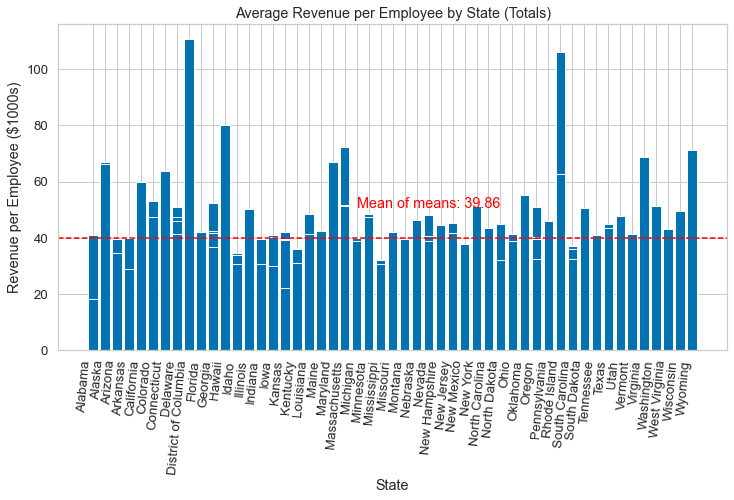

In [729]:
plotdata = vetpaybystate.reset_index()
# display(plotdata)

# create a figure with a wider width
fig = plt.figure(figsize=(12, 6))
plt.bar(plotdata.NAME, plotdata.revenue_per_employee)

# set the x and y axis labels
plt.xlabel('State')
plt.ylabel('Revenue per Employee ($1000s)')

# set the title of the chart
plt.title('Average Revenue per Employee by State (Totals)')

average = plotdata.revenue_per_employee.mean()
# add a dotted line for the average percent veteran
plt.axhline(y=average, color='red', linestyle='--')

# Add the label for the average line
plt.text(28, average + 11, f'Mean of means: {average:.2f}', ha='center', color='red')

# rotate the x-axis labels for better readability
plt.xticks(rotation=85, ha = 'right')

# show the plot
plt.show()

fig.savefig('jh4.png')

In [431]:
plotdata1 = plotdata.loc[plotdata['VET_GROUP_LABEL'].isin(['Veteran','Nonveteran'])]
plotdata1.head(3)

,NAME,VET_GROUP_LABEL,EMP,PAYANN,revenue_per_employee
1,Alabama,Nonveteran,3724.114650,146823.624204,39.425109
3,Alabama,Veteran,164.941176,2976.607843,18.046481
5,Alaska,Nonveteran,371.790541,24625.364865,66.234512


,NAME,VET_GROUP_LABEL,EMP,PAYANN,revenue_per_employee
35,District of Columbia,Veteran,49.270270,5452.810811,110.671421
47,Hawaii,Veteran,27.740741,2227.777778,80.307076
203,Wyoming,Veteran,24.411765,1741.117647,71.322892
33,District of Columbia,Nonveteran,626.899160,44123.117647,70.383118
187,Virginia,Veteran,1484.800000,101804.246154,68.564282
83,Maryland,Veteran,965.254902,64752.882353,67.083713
5,Alaska,Nonveteran,371.790541,24625.364865,66.234512
7,Alaska,Veteran,22.263158,1472.842105,66.156028
27,Connecticut,Veteran,406.388889,25877.305556,63.676213
159,Rhode Island,Veteran,124.714286,7799.107143,62.535796


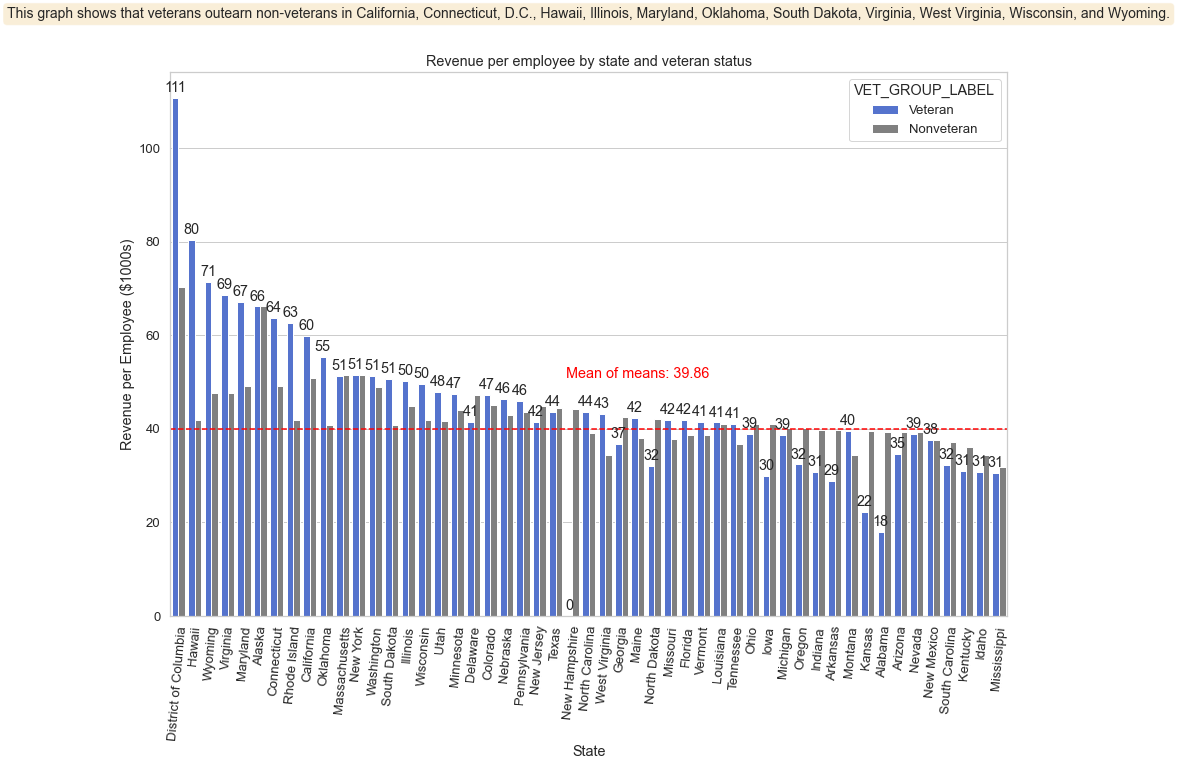

In [728]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="NAME", y="revenue_per_employee", hue="VET_GROUP_LABEL", palette={"Nonveteran": "grey", "Veteran": "royalblue"}, data=plotdata1, ax=ax)
ax.set_xlabel("State")
ax.set_ylabel("Revenue per Employee ($1000s)")
ax.set_title("Revenue per Employee by State and Veteran Status")

plt.xticks(rotation=85)
average = plotdata.revenue_per_employee.mean()
plt.axhline(y=average, color='red', linestyle='--')
plt.text(28, average + 11, f'Mean of means: {average:.2f}', ha='center', color='red')

textstr = "This graph shows that veterans outearn non-veterans in California, Connecticut, D.C., Hawaii, Illinois, Maryland, Oklahoma, South Dakota, Virginia, West Virginia, Wisconsin, and Wyoming."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text = ax.text(0.5, 1.12, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='center', bbox=props, wrap=True)

display(plotdata1.head(10))
# sort the data by the Veteran revenue per employee column
plotdata1 = plotdata1.sort_values(by='revenue_per_employee', ascending=False)

max_value = (plotdata1['revenue_per_employee'].max())

# loop through the bars and set the color and font weight of the highest value bars
for i, bar in enumerate(ax.containers):
    for rect in bar:
        if plotdata1.iloc[i]['revenue_per_employee']==max_value:
                height = rect.get_height()
                ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  textcoords='offset points', ha='center', va='bottom')

# set the x-axis label and title
plt.xlabel('State')
plt.title('Revenue per employee by state and veteran status')
fig.savefig('jh3.png');

The results show a marked disparity in revenue per employee by veteran or non veteran status in D.C. and less so in the next several ranked states. It makes sense after this investigation why the nation's capitol may be separated out from it's state, since this would skew the state level data likely for this and for many other factors studied by the Census Bureau.

I also wanted to look at which states had the highest percentage of veterans.  I pared down the existing data frame and reset the index to bring the indexing to the same level of hierarchy (row 0).

In [526]:
vetsbystate = vetpaybystate[['EMP']].reset_index()
vetsbystate.head(6)

,NAME,VET_GROUP_LABEL,EMP
0,Alabama,Equally veteran/nonveteran,21.516129
1,Alabama,Nonveteran,3724.114650
2,Alabama,Total,4279.823899
3,Alabama,Veteran,164.941176
4,Alaska,Equally veteran/nonveteran,0.000000
5,Alaska,Nonveteran,371.790541


I collected the number of employees in total for a state and the veterans, then created a new column for Percent Veteran to indicate the states overall proportion of veterans in their workforce.

In [719]:
total_emp = vetsbystate.loc[vetsbystate['VET_GROUP_LABEL'] == 'Total'].groupby('NAME')['EMP'].sum()
vet_emp = vetsbystate.loc[vetsbystate['VET_GROUP_LABEL'] == 'Veteran'].groupby('NAME')['EMP'].sum()

percent_vet = (vet_emp / total_emp) * 100
vetsbystate['percent_veteran'] = percent_vet.reindex(vetsbystate['NAME']).values.round(2)
vetsbystate = vetsbystate.loc[vetsbystate['VET_GROUP_LABEL']=='Total',:]
vetsbystate.head(7)

,NAME,VET_GROUP_LABEL,EMP,percent_veteran
2,Alabama,Total,4279.823899,3.85
6,Alaska,Total,392.105960,5.68
10,Arizona,Total,6315.155556,9.28
14,Arkansas,Total,2181.468531,11.48
18,California,Total,30944.568376,10.86
22,Colorado,Total,5464.789189,14.36
26,Connecticut,Total,3742.730769,10.86


I then used the plotly express module to create a treemap, where the size of the squares indicates the state's workforce, and the color grading indicates the percent veterans of those employees

In [727]:
fig = px.treemap(vetsbystate, 
                 path=[vetsbystate['NAME']], 
                 values='EMP', 
                 color='percent_veteran',
                 color_continuous_scale='RdBu')

# Update the layout of the figure
fig.update_layout(title='Percentage of Veterans by State', 
                  title_font_size=20, 
                  font_size=14)

# Show the figure
fig.show()

I also added a correlation matrix using the pandas factorize method and seaborn heatmap. 

Creating correlation matrices from categorical data is not possible in the Excel Data Analysis Toolpak since it only accepts numerical data for analysis by Pearson coefficient. I was curious to see what the seasborn heapmap would produce, given that most of the variables considered were categorical. 

The only factors with strong correlation are number of employees and annual pay, which is to be expected. One issue I had here was trying to get the labels to align with the grid.

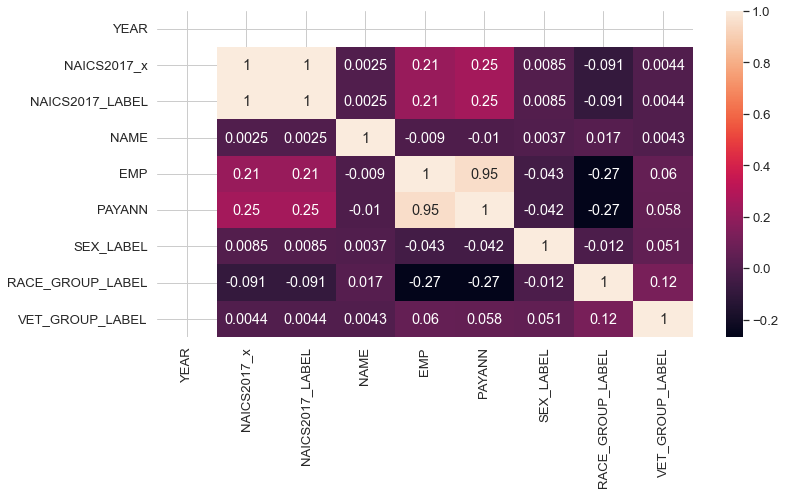

In [717]:
# Create a correlation matrix
fig = plt.figure(figsize=(12, 6))

factorized_df = df2019.apply(lambda x: pd.factorize(x)[0])
corr_mat = factorized_df.corr(method='pearson')
sns.heatmap(corr_mat, annot=True, 
            xticklabels=['YEAR','NAICS2017_x','NAICS2017_LABEL','NAME','EMP','PAYANN','SEX_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL'],
            yticklabels=['YEAR','NAICS2017_x','NAICS2017_LABEL','NAME','EMP','PAYANN','SEX_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL']);

plt.savefig("jh2.png")

## COVID EFFECT ON INDUSTRIAL SECTOR
This section investigates if there was an effect on certain industry sectors during the onset COVID pandemic.

I began this study looking at all 19 sectors listed in the sectors data frame, but it quickly became evident that certain industries produced values orders of magnitude larger than the majority. I separated out the very high earning sectors of Management of companies and enterprises', 'Professional, scientific, and technical services', 'Utilities', and the ambiguous 'Educational services.'  

In the code below, separate data frames are created for high_pay and reg_pay.

In [715]:
high_pay = cdf_us.loc[cdf_us['NAICS2017_LABEL'].isin(['Management of companies and enterprises', 'Professional, scientific, and technical services', 'Utilities','Educational services'])]
reg_pay = cdf_us[~cdf_us['NAICS2017_LABEL'].isin(['Management of companies and enterprises', 'Professional, scientific, and technical services', 'Utilities','Educational services'])]

high_df = high_pay.groupby(['YEAR','NAICS2017_LABEL']).agg('mean')
reg_df = reg_pay.groupby(['YEAR','NAICS2017_LABEL']).agg('mean')

high_df['revenue_per_employee'] = high_df.apply(lambda row: row['PAYANN']/row['EMP'] if row['EMP'] != 0 else 0,axis=1)
reg_df['revenue_per_employee'] = reg_df.apply(lambda row: row['PAYANN']/row['EMP'] if row['EMP'] != 0 else 0,axis=1)
display(us_sector_df.head(3))

C:\Users\13073\AppData\Local\Temp\ipykernel_18452\3294314142.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\13073\AppData\Local\Temp\ipykernel_18452\3294314142.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



revenue_per_employee
YEAR NAICS2017_LABEL                                                         
2018 Accommodation and food services                                20.065149
     Administrative and support and waste management...             40.170276
     Agriculture, forestry, fishing and hunting                     18.643510

,"('revenue_per_employee', 'Educational services')","('revenue_per_employee', 'Management of companies and enterprises')","('revenue_per_employee', 'Professional, scientific, and technical services')","('revenue_per_employee', 'Utilities')"
YEAR,,,,
2018,39.854696,1.109255e+02,87.249859,106.093706
2019,4086.963551,1.149395e+04,9087.092500,11218.973162
2020,4116.224887,1.121898e+06,9478.221848,11615.054464


,"('revenue_per_employee', 'Accommodation and food services')","('revenue_per_employee', 'Administrative and support and waste management and remediation services')","('revenue_per_employee', 'Agriculture, forestry, fishing and hunting')","('revenue_per_employee', 'Arts, entertainment, and recreation')","('revenue_per_employee', 'Construction')","('revenue_per_employee', 'Finance and insurance')","('revenue_per_employee', 'Health care and social assistance')","('revenue_per_employee', 'Industries not classified')","('revenue_per_employee', 'Information')","('revenue_per_employee', 'Manufacturing')","('revenue_per_employee', 'Mining, quarrying, and oil and gas extraction')","('revenue_per_employee', 'Other services (except public administration)')","('revenue_per_employee', 'Real estate and rental and leasing')","('revenue_per_employee', 'Retail trade')","('revenue_per_employee', 'Transportation and warehousing')","('revenue_per_employee', 'Wholesale trade')"
YEAR,,,,,,,,,,,,,,,,
2018,20.065149,40.170276,18.643510,34.776635,62.794733,102.627208,48.986512,14.451418,106.293355,60.30348,95.087489,33.768846,55.086426,29.132819,52.285161,74.393786
2019,21.199832,43.601996,25.508644,37.022231,65.211548,105.663184,50.441689,15.196228,113.515463,61.34853,98.246585,34.373214,57.612482,29.893450,51.911583,74.407272
2020,17.294044,45.116467,37.904370,30.139112,63.725500,115.159305,51.185162,30.058902,123.633792,61.62780,84.484562,32.409476,55.290942,30.567926,51.295855,75.762451


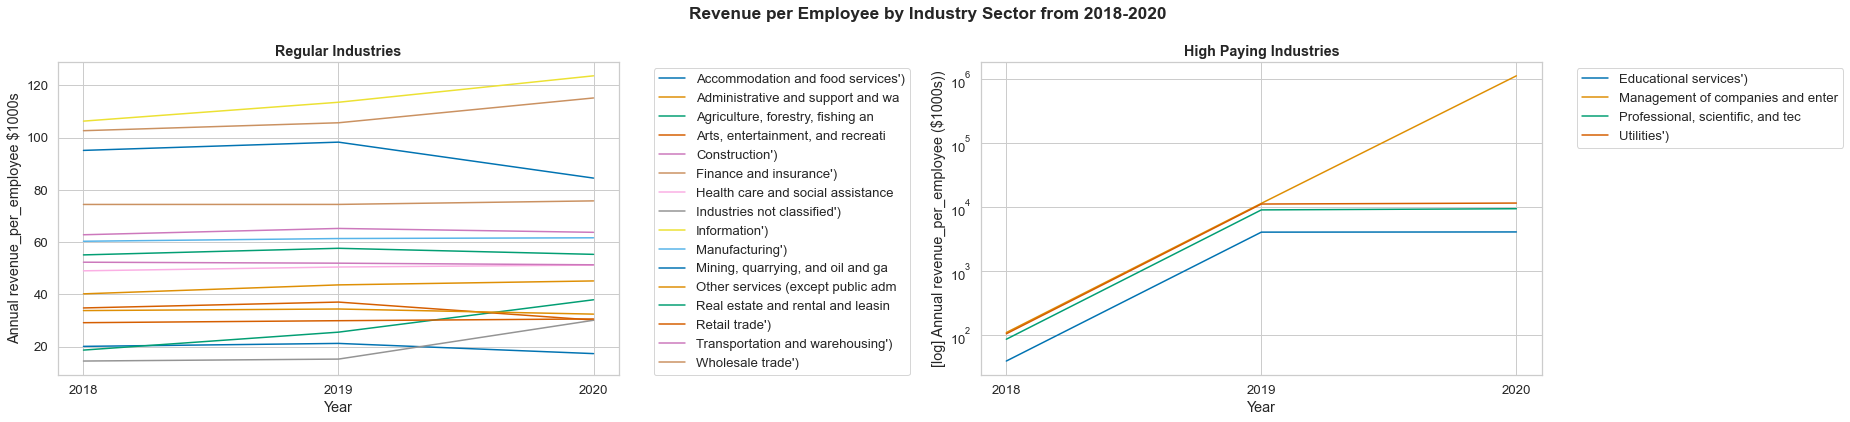

<Figure size 432x288 with 0 Axes>

In [716]:
high_df = high_df[['revenue_per_employee']]
reg_df = reg_df[['revenue_per_employee']]

display(hp)
display(rp)
hp = high_df.unstack(level='NAICS2017_LABEL')
rp = reg_df.unstack(level='NAICS2017_LABEL')

# Create a new figure with two subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(26, 6))

# Plot the data in the left subplot
rp.columns = rp.columns.map(lambda x: str(x))
for col in rp.columns:
    axs[0].plot(rp.index, rp[col], label='' + col[26:59])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Annual revenue_per_employee $1000s')
axs[0].set_title('Regular Industries',fontweight='bold')
axs[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Plot the data in the right subplot
hp.columns = hp.columns.map(lambda x: str(x))
for col in hp.columns:
    axs[1].plot(hp.index, hp[col], label='' + col[26:59])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('[log] Annual revenue_per_employee ($1000s))')
axs[1].set_title('High Paying Industries',fontweight='bold')
axs[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axs[1].set_yscale('log')  # Set the y-axis scale to log

# Set the overall title of the figure
fig.suptitle('Revenue per Employee by Industry Sector from 2018-2020',fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig("jh1.png")


The only industry sector that is significantly negatively impacted by the onset of COVID-19 is Accomodation and food services. 

Interestingly, Management of companies and enterprises experienced a sharp increase over these years, and in fact required logarithmic scaling the y axis. With more time, I would have liked to investigate what produced this outlier sector.